In [1]:
from boosting import GBRegressor
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

In [2]:
model = GBRegressor(base_model_params={'max_depth': 3, 'min_samples_leaf': 2},
                    n_estimators = 600, 
                    learning_rate=0.05,
                    use_best_model=True)

In [3]:
data = fetch_california_housing()
x = data.data[:1000]
y = data.target[:1000]
x_val = data.data[1000:1500]
y_val = data.target[1000:1500]

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 82.36it/s]


GBRegressor(base_model_params={'max_depth': 3, 'min_samples_leaf': 2},
            learning_rate=0.05000000074505806, n_estimators=600,
            subsample=0.30000001192092896, use_best_model=True,
            valid_control=1.000000013351432e-10)

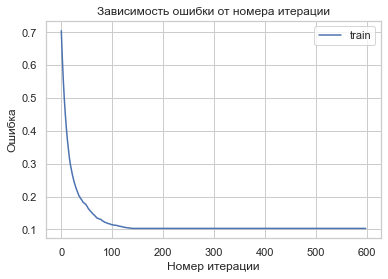

In [4]:
model.fit(x, y)

In [5]:
model.predict(x_val)

ValueError: attempt to get argmin of an empty sequence